In [2]:
# 1. 영어가 아닌 단어 제거
# 2. 소문자로 정규화 하여 토큰화
# 3. 불용어 제거
# 4. 단어 형태를 일반화하기 위해 표제어 추출

In [13]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS, WordCloud
import nltk

In [12]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
# riss_bigdata.csv 에서 제목 출력
all_data = pd.read_csv('riss_bigdata.csv', encoding='utf-8')
all_title = all_data['제목']
all_title

0     Big Data in Healthcare: Opportunities and Chal...
1     Combining Human Computing and Machine Learning...
2                          Big data (lost) in the cloud
3     Big Earth data: A new frontier in Earth and in...
4     Common Big Data Challenges and How to Overcome...
                            ...                        
95    Big-BOE: Fusing Spanish Official Gazette with ...
96    Resting-State fMRI Functional Connectivity: Bi...
97    A reference architecture for big data solution...
98    Thermal-Aware and DVFS-Enabled Big Data Task S...
99    Call for Papers: Special Issue on Big Data in ...
Name: 제목, Length: 100, dtype: object

In [25]:
stopWords = set(stopwords.words('english'))

In [27]:
first_title = all_title[0:1]
first_title

0    Big Data in Healthcare: Opportunities and Chal...
Name: 제목, dtype: object

In [35]:
lemma = WordNetLemmatizer()

EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(first_title))
EnWords

' Big Data in Healthcare Opportunities and Chal Name dtype object'

In [36]:
EnWordsToken = word_tokenize(EnWords.lower())
EnWordsToken

['big',
 'data',
 'in',
 'healthcare',
 'opportunities',
 'and',
 'chal',
 'name',
 'dtype',
 'object']

In [37]:
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
EnWordsTokenStop

['big',
 'data',
 'healthcare',
 'opportunities',
 'chal',
 'name',
 'dtype',
 'object']

In [38]:
EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
EnWordsTokenStopLemma

['big', 'data', 'healthcare', 'opportunity', 'chal', 'name', 'dtype', 'object']

In [26]:
lemma = WordNetLemmatizer() # 표제어 추출 객체
words =[]

for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+',' ',str(title)) # 영어가 아닌 것을 공백으로 대체 (^ not)
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 기본 형태
    words.append(EnWordsTokenStopLemma)
    
words

[['big', 'data', 'healthcare', 'opportunity', 'challenge'],
 ['combining',
  'human',
  'computing',
  'machine',
  'learning',
  'make',
  'sense',
  'big',
  'aerial',
  'data',
  'disaster',
  'response'],
 ['big', 'data', 'lost', 'cloud'],
 ['big',
  'earth',
  'data',
  'new',
  'frontier',
  'earth',
  'information',
  'science'],
 ['common', 'big', 'data', 'challenge', 'overcome'],
 ['stgi',
  'spatio',
  'temporal',
  'grid',
  'index',
  'model',
  'marine',
  'big',
  'data'],
 ['tv', 'audience', 'measurement', 'big', 'data'],
 ['u',
  'army',
  'person',
  'event',
  'data',
  'environment',
  'military',
  'civilian',
  'big',
  'data',
  'enterprise'],
 ['medical',
  'school',
  'training',
  'relate',
  'practice',
  'evidence',
  'big',
  'data'],
 ['exercise',
  'exploring',
  'big',
  'data',
  'producing',
  'reliable',
  'statistical',
  'information'],
 ['gsio',
  'programmatic',
  'interface',
  'delivering',
  'big',
  'earth',
  'data',
  'service'],
 ['semantics

In [41]:
# 전처리가 끝난 words를 1차원 list
from functools import reduce
words1 = list(reduce(lambda x, y: x+y, words))
words1

['big',
 'data',
 'healthcare',
 'opportunity',
 'challenge',
 'combining',
 'human',
 'computing',
 'machine',
 'learning',
 'make',
 'sense',
 'big',
 'aerial',
 'data',
 'disaster',
 'response',
 'big',
 'data',
 'lost',
 'cloud',
 'big',
 'earth',
 'data',
 'new',
 'frontier',
 'earth',
 'information',
 'science',
 'common',
 'big',
 'data',
 'challenge',
 'overcome',
 'stgi',
 'spatio',
 'temporal',
 'grid',
 'index',
 'model',
 'marine',
 'big',
 'data',
 'tv',
 'audience',
 'measurement',
 'big',
 'data',
 'u',
 'army',
 'person',
 'event',
 'data',
 'environment',
 'military',
 'civilian',
 'big',
 'data',
 'enterprise',
 'medical',
 'school',
 'training',
 'relate',
 'practice',
 'evidence',
 'big',
 'data',
 'exercise',
 'exploring',
 'big',
 'data',
 'producing',
 'reliable',
 'statistical',
 'information',
 'gsio',
 'programmatic',
 'interface',
 'delivering',
 'big',
 'earth',
 'data',
 'service',
 'semantics',
 'way',
 'semantic',
 'web',
 'open',
 'science',
 'big',
 'ea

In [42]:
# 단어 빈도수 구하기
from collections import Counter
counter = Counter(words1)
counter

Counter({'big': 104,
         'data': 116,
         'healthcare': 2,
         'opportunity': 2,
         'challenge': 6,
         'combining': 1,
         'human': 4,
         'computing': 2,
         'machine': 3,
         'learning': 3,
         'make': 1,
         'sense': 1,
         'aerial': 1,
         'disaster': 1,
         'response': 2,
         'lost': 2,
         'cloud': 3,
         'earth': 18,
         'new': 5,
         'frontier': 2,
         'information': 3,
         'science': 6,
         'common': 1,
         'overcome': 1,
         'stgi': 1,
         'spatio': 1,
         'temporal': 1,
         'grid': 1,
         'index': 1,
         'model': 5,
         'marine': 1,
         'tv': 1,
         'audience': 1,
         'measurement': 2,
         'u': 1,
         'army': 1,
         'person': 1,
         'event': 1,
         'environment': 1,
         'military': 1,
         'civilian': 1,
         'enterprise': 1,
         'medical': 1,
         'school': 1,
   

In [67]:
# 상위 50개 단어 딕셔너리에 저장
word_count = dict()
# counter.most_common(50)
for tag, counts in counter.most_common(50):
    if(len(str(tag))>5):
        word_count[tag] = counts
word_count

{'analytics': 16,
 'analysis': 8,
 'challenge': 6,
 'science': 6,
 'special': 6,
 'health': 5,
 'research': 4,
 'processing': 4,
 'approach': 4,
 'perspective': 4,
 'market': 4,
 'review': 4,
 'machine': 3,
 'learning': 3,
 'information': 3,
 'scientific': 3,
 'classification': 3,
 'computational': 3,
 'propaganda': 3,
 'political': 3,
 'search': 3,
 'global': 3,
 'education': 3,
 'survey': 3,
 'driven': 3,
 'efficient': 3,
 'predictive': 3,
 'robotics': 3,
 'system': 3,
 'solution': 3,
 'healthcare': 2,
 'opportunity': 2,
 'computing': 2,
 'response': 2,
 'frontier': 2}

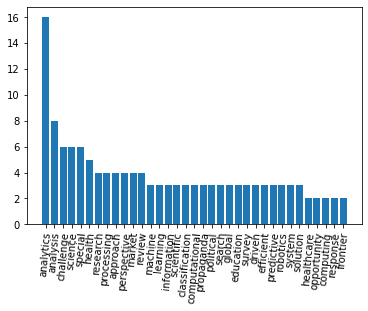

In [68]:
import matplotlib.pyplot as plt
#히스토그램 그리기
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.show()

In [62]:
# del word_count['big']
# del word_count['data']

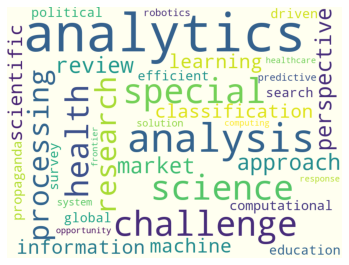

In [69]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
f= plt.figure(figsize=(6, 6))
plt.imshow(cloud)
plt.axis('off')
plt.show()
f.savefig('eng_word.png')